In [ ]:
# Installing Pillow Libraries
%pip install scikit-learn matplotlib Pillow

In [4]:
import numpy as np
import pandas as pd
import os
from random import randrange
from matplotlib import pyplot as plt
from PIL import Image

In [5]:
cfw_dict = {
    'Amitabhbachan': 0,
    'AamirKhan': 1,
    'DwayneJohnson': 2,
    'AishwaryaRai': 3,
    'BarackObama': 4,
    'NarendraModi': 5,
    'ManmohanSingh': 6,
    'VladimirPutin': 7
}

opt = {
    'image_size': 32,
    'is_grayscale': False,
    'val_split': 0.75
}

In [6]:
def load_image(path):
    im = Image.open(path).convert('L' if opt['is_grayscale'] else 'RGB')
    im = im.resize((opt['image_size'],opt['image_size']))
    im = np.array(im)
    im = im/256
    return im

def display_images(imgs,classes,row=1,col=2,w=32,h=32):
    fig=plt.figure(figsize=(8, 8))
    for i in range(1, col*row +1):
        img = imgs[i-1]
        fig.add_subplot(row, col, i)
        
        if opt['is_grayscale']:
            plt.imshow(img , cmap='gray') 
        else:
            plt.imshow(img)
        
        plt.title("Class:{}".format(classes[i-1]))
        plt.axis('off')
    plt.show()

def load_data(dir_path):
    image_list = []
    y_list = []
    label_dict = cfw_dict
    for filename in sorted(os.listdir(dir_path)):
        if filename.endswith(".png"):
            im = load_image(os.path.join(dir_path,filename))
            y = filename.split('_')[0]
            y = label_dict[y] 
            image_list.append(im)
            y_list.append(y)
        else:
            continue
    image_list = np.array(image_list)
    y_list = np.array(y_list)
    print("Dataset shape:",image_list.shape)
    print("Label shape:",y_list.shape)

    return image_list,y_list

In [7]:
dirpath = 'SMAI-PCAdataset/IIIT-CFW/'
X,y_images = load_data(dirpath)

Dataset shape: (672, 32, 32, 3)
Label shape: (672,)


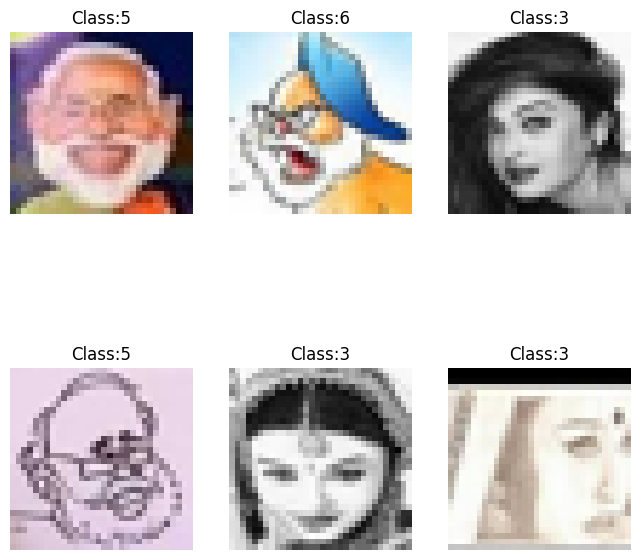

In [8]:
N,H,W = X.shape[0:3]
C = 1 if opt['is_grayscale'] else X.shape[3]

ind = np.random.randint(0,y_images.shape[0],6)
display_images(X[ind,...],y_images[ind], row=2,col=3)

### Task 1.1 PCA

#### Task 1.1.1 Implementation of PCA

In [9]:
class PCA:

  def __init__(self, n_components = 2):
    self.n_components = n_components
    self.total_variance = None
    self.eigenvalues = None
    self.components = None
    self.mean = None
    
  def set_n_components(self, n_components):
    self.n_components = n_components

  def fit(self, X):
    # mean centering
    self.mean = np.mean(X, axis=0)

    # covariance, functions needs samples as columns
    cov = np.cov(X.T)

    # eigenvectors, eigenvalues
    eigenvalues, eigenvectors = np.linalg.eig(cov)

    # eigenvectors v = [:, i] column vector, transpose this for easier calculations
    eigenvectors = eigenvectors.T

    # sort eigenvectors
    idxs = np.argsort(eigenvalues)[::-1]
    self.eigenvalues = np.real(eigenvalues[idxs])
    self.components = eigenvectors[idxs]
    
    self.total_variance = np.sum(self.eigenvalues)

  def transform(self, X):
    # projects data
    X = X - self.mean
    components = self.components[:self.n_components]
    eigenvalues = self.eigenvalues[:self.n_components]
    return np.real(np.dot(X, components.T)), eigenvalues
  
  def explained_variance_ratio(self,eigenvalues):
    # Calculate explained variance ratio
    # print(eigenvalues)
    explained_variance_ratio = np.array(eigenvalues) / self.total_variance
    # print(explained_variance_ratio)
    return np.cumsum(explained_variance_ratio)

In [10]:
X = X.reshape(N, H*W*C)
print(X.shape)

X_orig = X

(672, 3072)


In [11]:
pca = PCA(600)
pca.fit(X)
X_projected, egnval = pca.transform(X)
cumulative_explained_variances = np.array(pca.explained_variance_ratio(egnval))

#### Task 1.1.2 Plotting the relationship between cumulative explained variance and the number of principal components

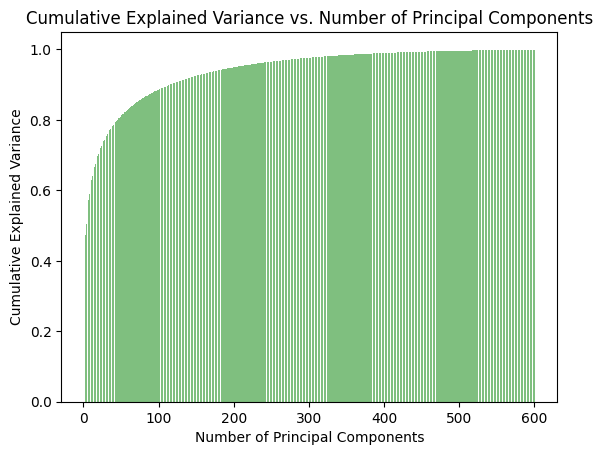

In [12]:
plt.bar(range(1, len(cumulative_explained_variances) + 1), cumulative_explained_variances, alpha=0.5, align='center', color = 'green')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.show()

### Task 1.1.3 Dimensionality reduction on features on pictionary dataset (assignment 1)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [14]:
data = np.load('./data.npy', allow_pickle=True)

X_ResNet = []
X_Vit = []
y = data[:, 3]

for row in data:
  X_ResNet.append(row[1].flatten())
  X_Vit.append(row[2].flatten())


In [15]:
X_ResNet_train, X_ResNet_test, y_ResNet_train, y_ResNet_test = train_test_split(X_ResNet, y, test_size=0.2, random_state=42)
X_Vit_train, X_Vit_test, y_Vit_train, y_Vit_test = train_test_split(X_Vit, y, test_size=0.2, random_state=42)

Metrics for the original dataset

In [16]:
k = 1  # Number of neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_ResNet_train, y_ResNet_train)

# Make predictions and evaluate
y_pred = knn_classifier.predict(X_ResNet_test)

accuracy = accuracy_score(y_ResNet_test, y_pred)
precision = precision_score(y_ResNet_test, y_pred, average='macro', zero_division=0)
recall = recall_score(y_ResNet_test, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_ResNet_test, y_pred, average='macro', zero_division=0)


print("Accuracy:", accuracy*100)
print("Precision:", precision*100)
print("Recall:", recall*100)
print("F1 Score:", f1*100)

Accuracy: 18.666666666666668
Precision: 11.265624999999998
Recall: 12.218253968253967
F1 Score: 10.572736291486292


In [17]:
k = 1  # Number of neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_Vit_train, y_Vit_train)

# Make predictions and evaluate
y_pred = knn_classifier.predict(X_Vit_test)

accuracy = accuracy_score(y_Vit_test, y_pred)
precision = precision_score(y_Vit_test, y_pred, average='macro', zero_division=0)
recall = recall_score(y_Vit_test, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_Vit_test, y_pred, average='macro', zero_division=0)

print("Accuracy:", accuracy*100)
print("Precision:", precision*100)
print("Recall:", recall*100)
print("F1 Score:", f1*100)

Accuracy: 27.0
Precision: 15.659509202453986
Recall: 17.65215697731035
F1 Score: 15.416250416250415


Dimensionality reduction on the original dataset

In [18]:
n_components = 20
pca = PCA(n_components=n_components)

pca.fit(np.array(X_ResNet))
X_ResNet_pca, egnval = pca.transform(X_ResNet)

pca.fit(np.array(X_Vit))
X_Vit_pca, egnval = pca.transform(X_Vit)

In [19]:
X_ResNet_train_pca, X_ResNet_test_pca, y_ResNet_train, y_ResNet_test = train_test_split(X_ResNet_pca, y, test_size=0.2, random_state=42)
X_Vit_train_pca, X_Vit_test_pca, y_Vit_train, y_Vit_test = train_test_split(X_Vit_pca, y, test_size=0.2, random_state=42)

Metrics for the reduced dataset

In [20]:
k = 1  # Number of neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_ResNet_train_pca, y_ResNet_train)

# Make predictions and evaluate
y_pred = knn_classifier.predict(X_ResNet_test_pca)

accuracy = accuracy_score(y_ResNet_test, y_pred)
precision = precision_score(y_ResNet_test, y_pred, average='macro', zero_division=0)
recall = recall_score(y_ResNet_test, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_ResNet_test, y_pred, average='macro', zero_division=0)


print("Accuracy:", accuracy*100)
print("Precision:", precision*100)
print("Recall:", recall*100)
print("F1 Score:", f1*100)

Accuracy: 15.333333333333332
Precision: 10.440379403794037
Recall: 10.327138985675571
F1 Score: 9.376737760884101


In [21]:
k = 1  # Number of neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_Vit_train_pca, y_Vit_train)

# Make predictions and evaluate
y_pred = knn_classifier.predict(X_Vit_test_pca)

accuracy = accuracy_score(y_Vit_test, y_pred)
precision = precision_score(y_Vit_test, y_pred, average='macro', zero_division=0)
recall = recall_score(y_Vit_test, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_Vit_test, y_pred, average='macro', zero_division=0)

print("Accuracy:", accuracy*100)
print("Precision:", precision*100)
print("Recall:", recall*100)
print("F1 Score:", f1*100)

Accuracy: 18.666666666666668
Precision: 10.306594860166287
Recall: 10.790816326530612
F1 Score: 9.87175853247282


#### Observations

- Reduced the dataset to 20 dimensions.
- The accuracy with the original dataset is 18% and 27% for the triplets using RESNET and VIT, respectively.
- The accuracy with the reduced dataset is 15% and 18% for the triplets using RESNET and VIT, respectively.
- We can observe that the accuracy is reduced when we reduce the dimensions of the dataset.
- This reduction in accuracy can be attributed to the fact that we are reducing the dimensions of the dataset, resulting in the loss of some information.

These observations highlight the trade-off between dimensionality reduction and model performance. While reducing dimensions can help with computational efficiency and noise reduction, it may also lead to a loss of valuable information, impacting the model's accuracy.


#### Task 1.1.4 Impact of dimensionality reduction on the performance of the model

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_orig, y_images, test_size=0.2, random_state=42)

k = 1  # Number of neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = knn_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

print("Accuracy:", accuracy*100)
print("Precision:", precision*100)
print("Recall:", recall*100)
print("F1 Score:", f1*100)

Accuracy: 45.18518518518518
Precision: 53.40986259428765
Recall: 45.89111943230936
F1 Score: 44.53007518796993


In [23]:
accuracies = []

pca = PCA(H*W*C)
pca.fit(X_orig)
X_pca, egnval = pca.transform(X_orig)

for i in range(1,600+1):

  X_train, X_test, y_train, y_test = train_test_split(X_pca[:,:i], y_images, test_size=0.2, random_state=42)

  k = 1  # Number of neighbors
  knn_classifier = KNeighborsClassifier(n_neighbors=k)
  knn_classifier.fit(X_train, y_train)

  # Make predictions and evaluate
  y_pred = knn_classifier.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  accuracies.append(accuracy)
  

#### Plot the relationship between the number of principal components and the accuracy of the model

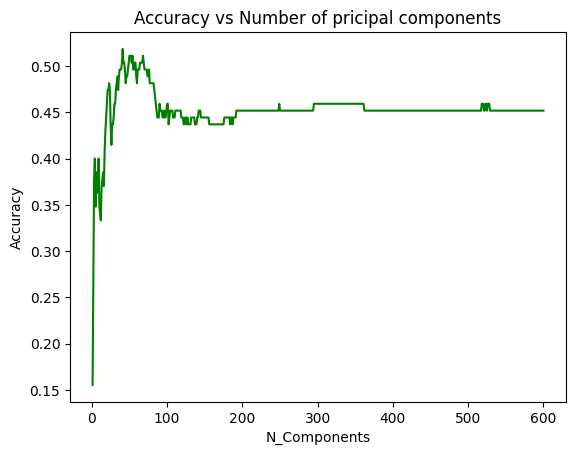

In [24]:
plt.plot(range(1, len(accuracies) + 1), accuracies, color = 'green')
plt.xlabel('N_Components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of pricipal components')
plt.show()

#### Task 1.2 Pictionary dataset

In [31]:
data = pd.read_csv('drawer_attributes.csv')
categorical_columns=data.columns.tolist()

drawer_data=data[categorical_columns]
drawer_data=drawer_data.iloc[:,1:]
drawer_data=np.array(drawer_data)
pca = PCA(n_components = drawer_data.shape[1])
pca.fit(drawer_data)
drawer_projected, egnval = pca.transform(drawer_data)

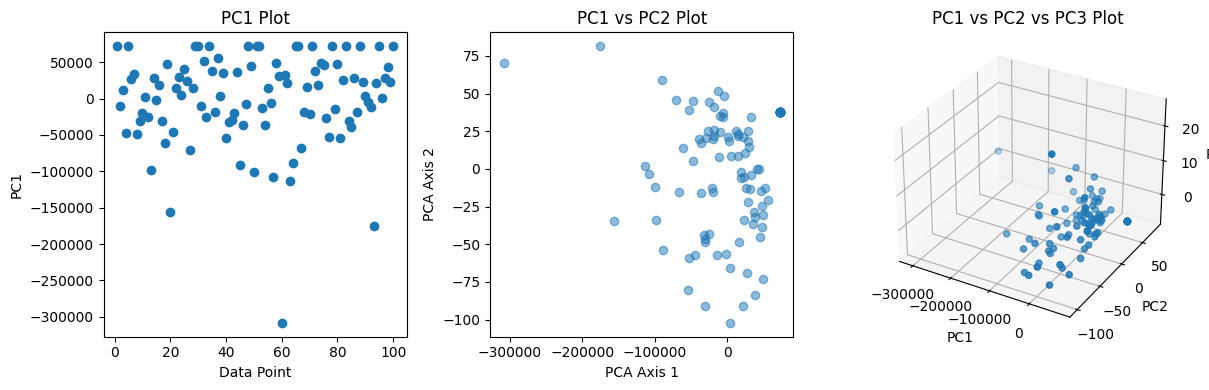

In [38]:
plt.figure(figsize=(12, 4))

plt.subplot(1,3,1)
plt.scatter(range(1, len(drawer_projected) + 1), drawer_projected[:, 0], marker='o')
plt.xlabel('Data Point')
plt.ylabel('PC1')
plt.title('PC1 Plot')

plt.subplot(1,3,2)
plt.scatter(drawer_projected[:, 0], drawer_projected[:, 1], alpha=0.5)
plt.title("PCA for Drawer")
plt.xlabel("PCA Axis 1")
plt.ylabel("PCA Axis 2")
plt.title('PC1 vs PC2 Plot')

ax = plt.subplot(1,3,3, projection='3d')
ax.scatter(drawer_projected[:, 0],drawer_projected[:, 1], drawer_projected[:, 2], marker='o')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('PC1 vs PC2 vs PC3 Plot')

plt.tight_layout()
plt.show()

In [35]:
data = pd.read_csv('guesser_attributes.csv')
categorical_columns=data.columns.tolist()

guesser_data=data[categorical_columns]
guesser_data = guesser_data.iloc[:,1:]
guesser_data=np.array(guesser_data)
pca = PCA(n_components = guesser_data.shape[1])
pca.fit(guesser_data)
guesser_projected, egnval = pca.transform(guesser_data)

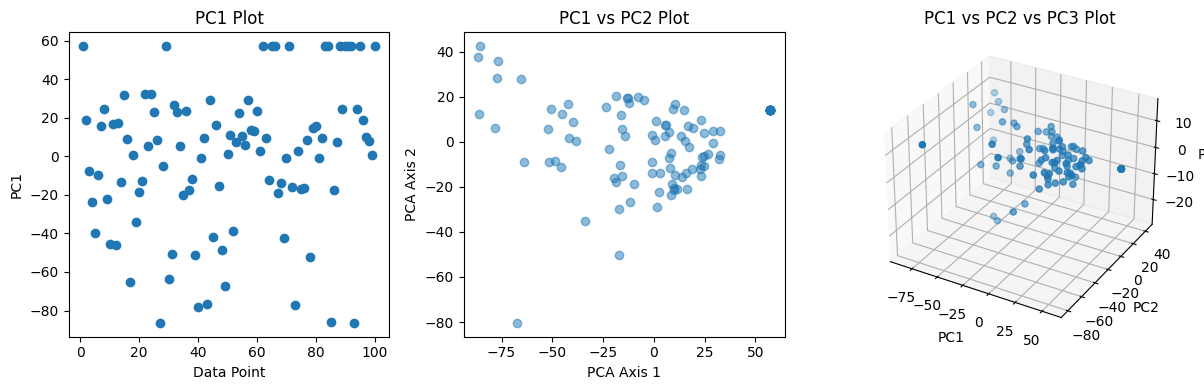

In [37]:
plt.figure(figsize=(12, 4))

plt.subplot(1,3,1)
plt.scatter(range(1, len(guesser_projected) + 1), guesser_projected[:, 0], marker='o')
plt.xlabel('Data Point')
plt.ylabel('PC1')
plt.title('PC1 Plot')

plt.subplot(1,3,2)
plt.scatter(guesser_projected[:, 0], guesser_projected[:, 1], alpha=0.5)
plt.title("PCA for guesser")
plt.xlabel("PCA Axis 1")
plt.ylabel("PCA Axis 2")
plt.title('PC1 vs PC2 Plot')

ax = plt.subplot(1,3,3, projection='3d')
ax.scatter(guesser_projected[:, 0],guesser_projected[:, 1], guesser_projected[:, 2], marker='o')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('PC1 vs PC2 vs PC3 Plot')

plt.tight_layout()
plt.show()

# Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is a dimensionality reduction technique used in data analysis and machine learning. It allows you to transform a dataset into a new coordinate system, where the axes, known as principal components (PCs), capture the most significant variance in the data.

## Key Concepts

### Principal Component 1 (PC1)

- **Definition**: PC1 represents the direction in the original feature space along which the data varies the most.
- **Characteristics**:
  - Captures the maximum variance in the data.
  - Represents the most dominant pattern or trend present in the data.

### Principal Component 2 (PC2)

- **Definition**: PC2 represents the direction orthogonal (perpendicular) to PC1 in the original feature space.
- **Characteristics**:
  - Captures the second most variance in the data but is uncorrelated with PC1.
  - May capture additional patterns or variations that are orthogonal to the dominant trend captured by PC1.

### Principal Component 3 (PC3)

- **Definition**: PC3 represents the direction orthogonal to both PC1 and PC2.
- **Characteristics**:
  - Captures the third most variance in the data and is uncorrelated with both PC1 and PC2.
  - May capture further patterns or variations that are independent of the first two principal components.

and so on

### Higher-Numbered Principal Components

- Similar to PC1, PC2, and PC3, higher-numbered principal components continue to represent directions in the feature space that capture decreasing amounts of variance while being orthogonal to previous components.